In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_table('./train.tsv')
test = pd.read_table('./test.tsv')

In [46]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205,10
1,3,F,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490,11
2,7,F,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375,11
3,12,M,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080,10
4,16,I,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090,6


In [47]:
test.head(5)

,id,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,F,0.710,0.570,0.195,1.9805,0.9925,0.4925,0.4800
1,2,F,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350
2,4,M,0.700,0.580,0.205,2.1300,0.7415,0.4900,0.5800
3,5,F,0.670,0.525,0.190,1.5270,0.5755,0.3530,0.4400
4,6,I,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645


データ数の確認

In [48]:
print(train.shape, test.shape)

(2088, 10) (2089, 9)


In [49]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2088 non-null   int64  
 1   Sex             2088 non-null   object 
 2   Length          2088 non-null   float64
 3   Diameter        2088 non-null   float64
 4   Height          2088 non-null   float64
 5   Whole weight    2088 non-null   float64
 6   Shucked weight  2088 non-null   float64
 7   Viscera weight  2088 non-null   float64
 8   Shell weight    2088 non-null   float64
 9   Rings           2088 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 163.2+ KB
None


In [50]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2089 non-null   int64  
 1   Sex             2089 non-null   object 
 2   Length          2089 non-null   float64
 3   Diameter        2089 non-null   float64
 4   Height          2089 non-null   float64
 5   Whole weight    2089 non-null   float64
 6   Shucked weight  2089 non-null   float64
 7   Viscera weight  2089 non-null   float64
 8   Shell weight    2089 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 147.0+ KB
None


重複部分の確認

In [51]:
print('train: ', train.duplicated().sum())
print('test: ', test.duplicated().sum())

train:  0
test:  0


In [52]:
counts_disease_train = train['Rings'].value_counts()
print(counts_disease_train)

9     357
10    309
8     285
11    215
7     187
12    135
6     128
13    108
5      72
14     60
15     56
4      32
17     31
16     31
19     23
18     22
20     12
21      9
3       6
22      3
23      3
24      2
29      1
2       1
Name: Rings, dtype: int64


グラフの描画

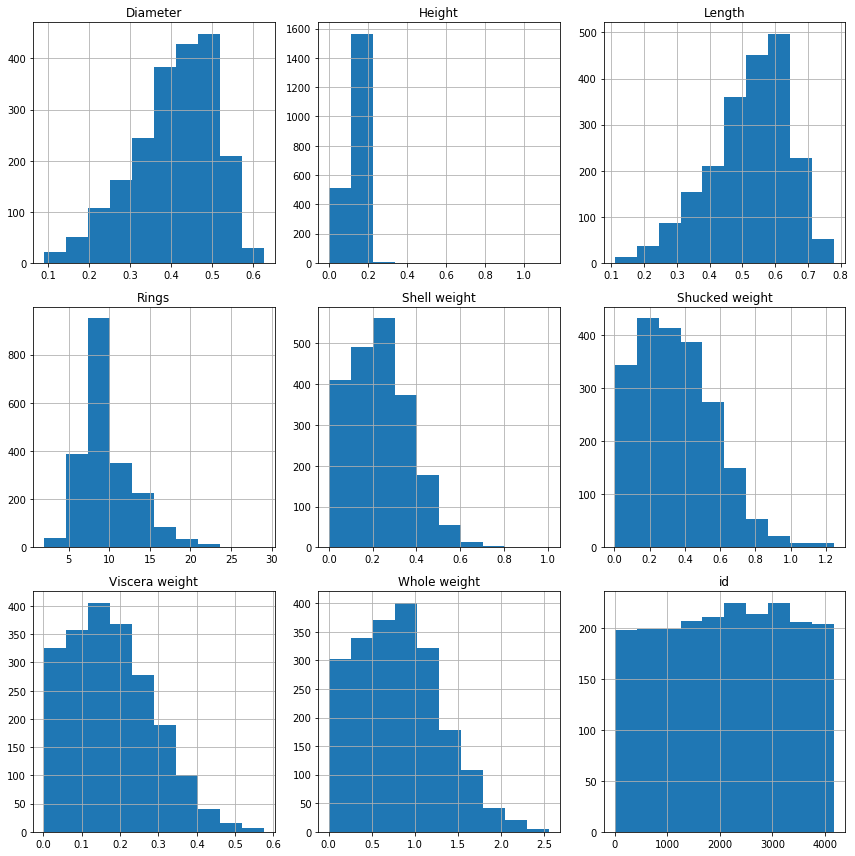

In [53]:
train.hist(figsize=(12, 12))
plt.tight_layout()
plt.show();

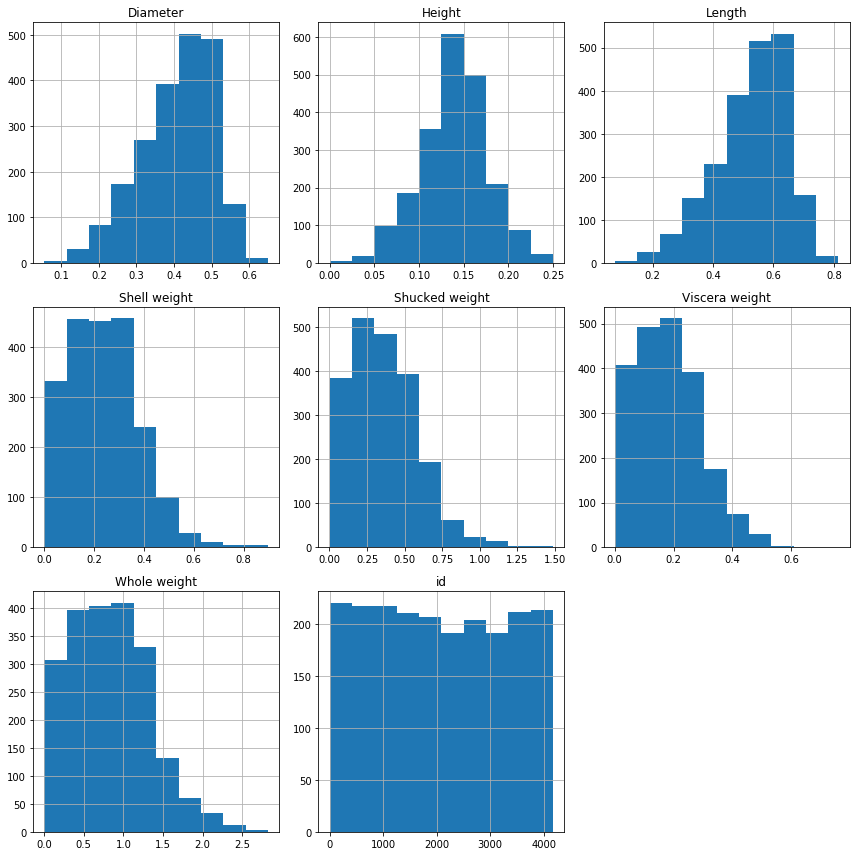

In [54]:
test.hist(figsize=(12, 12))
plt.tight_layout()
plt.show();

In [55]:
train['Sex'].value_counts()

M    762
I    676
F    650
Name: Sex, dtype: int64

In [56]:
train_rings = train['Rings']

train_sex = train['Sex']
test_sex = test['Sex']

In [57]:
train = train.drop(['id', 'Sex', 'Rings'], axis=1)
test = test.drop(['id', 'Sex'], axis=1)

In [58]:
train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.530,0.435,0.155,0.6990,0.2880,0.1595,0.205
1,0.710,0.565,0.195,1.8170,0.7850,0.4920,0.490
2,0.625,0.520,0.180,1.3540,0.4845,0.3510,0.375
3,0.375,0.280,0.095,0.2225,0.0875,0.0430,0.080
4,0.415,0.330,0.090,0.3595,0.1700,0.0810,0.090


In [59]:
test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.710,0.570,0.195,1.9805,0.9925,0.4925,0.4800
1,0.485,0.395,0.160,0.6600,0.2475,0.1280,0.2350
2,0.700,0.580,0.205,2.1300,0.7415,0.4900,0.5800
3,0.670,0.525,0.190,1.5270,0.5755,0.3530,0.4400
4,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645


# データの標準化

In [60]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
train_scl = scl.fit_transform(train)
test_scl = scl.fit_transform(test)

train_scl = pd.DataFrame(train_scl, columns=train.columns)
test_scl = pd.DataFrame(test_scl, columns=test.columns)

In [61]:
train_scl.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.067103,0.283694,0.347376,-0.247779,-0.308351,-0.172996,-0.231028
1,1.553245,1.580308,1.238846,2.058460,1.965064,2.898642,1.814044
2,0.851456,1.131480,0.904545,1.103372,0.590494,1.596083,0.988839
3,-1.212631,-1.262269,-0.989828,-1.230716,-1.225493,-1.249224,-1.127989
4,-0.882377,-0.763571,-1.101262,-0.948108,-0.848115,-0.898179,-1.056232


In [62]:
test_scl.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.545395,1.637977,1.437134,2.304381,2.794616,2.791515,1.723357
1,-0.345491,-0.144707,0.528879,-0.359867,-0.514453,-0.495639,-0.039319
2,1.461356,1.739845,1.696635,2.606013,1.679749,2.768969,2.442817
3,1.209238,1.179573,1.307383,1.389397,0.942426,1.533468,1.435573
4,-0.765688,-1.112449,-0.509127,-0.487985,-0.463374,-0.396438,-0.546538


# データの結合

In [63]:
train_scl_sex = pd.concat([train_scl, train_sex], axis=1)
test_scl_sex = pd.concat([test_scl, test_sex], axis=1)

# データのダミー変数化

In [64]:
train_scl_sex_fin = pd.get_dummies(train_scl_sex, dummy_na=True)
test_scl_sex_fin = pd.get_dummies(test_scl_sex, dummy_na=True)

In [65]:
train_scl_sex_fin.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Sex_nan
0,0.067103,0.283694,0.347376,-0.247779,-0.308351,-0.172996,-0.231028,0,0,1,0
1,1.553245,1.580308,1.238846,2.058460,1.965064,2.898642,1.814044,1,0,0,0
2,0.851456,1.131480,0.904545,1.103372,0.590494,1.596083,0.988839,1,0,0,0
3,-1.212631,-1.262269,-0.989828,-1.230716,-1.225493,-1.249224,-1.127989,0,0,1,0
4,-0.882377,-0.763571,-1.101262,-0.948108,-0.848115,-0.898179,-1.056232,0,1,0,0


In [66]:
test_scl_sex_fin.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Sex_nan
0,1.545395,1.637977,1.437134,2.304381,2.794616,2.791515,1.723357,1,0,0,0
1,-0.345491,-0.144707,0.528879,-0.359867,-0.514453,-0.495639,-0.039319,1,0,0,0
2,1.461356,1.739845,1.696635,2.606013,1.679749,2.768969,2.442817,0,0,1,0
3,1.209238,1.179573,1.307383,1.389397,0.942426,1.533468,1.435573,1,0,0,0
4,-0.765688,-1.112449,-0.509127,-0.487985,-0.463374,-0.396438,-0.546538,0,1,0,0


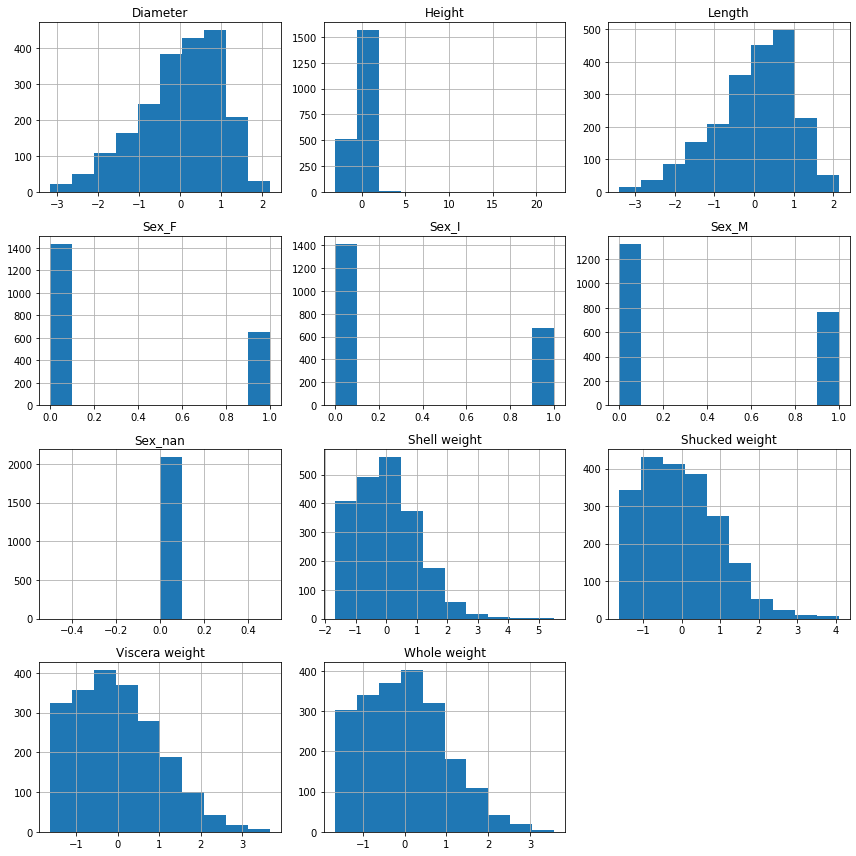

In [67]:
train_scl_sex_fin.hist(figsize=(12, 12))
plt.tight_layout()
plt.show();

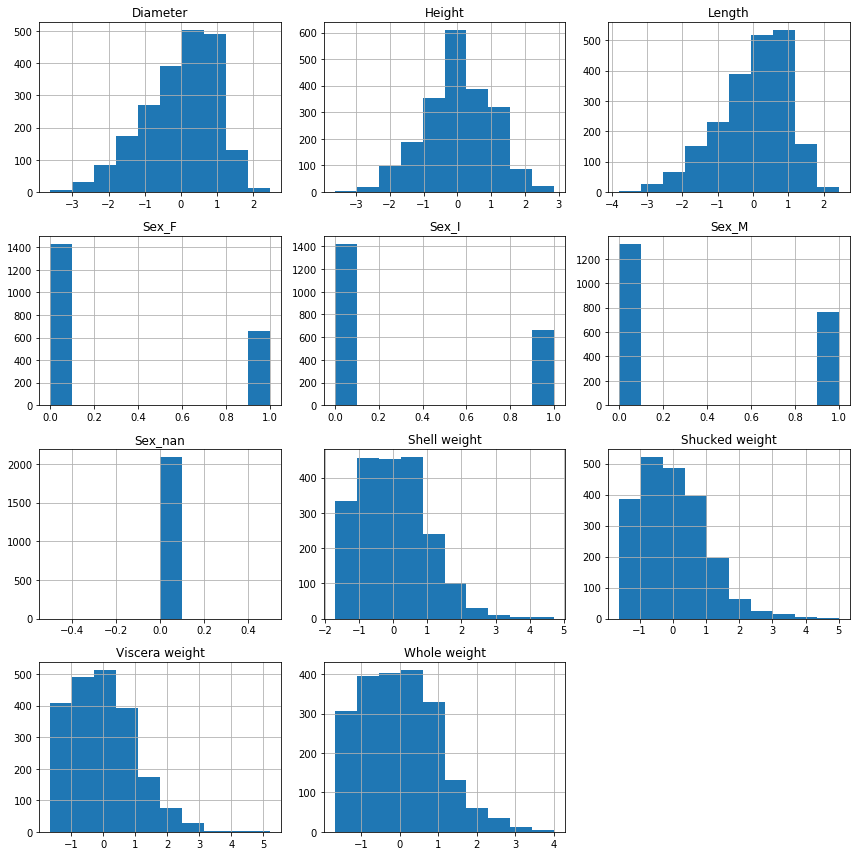

In [68]:
test_scl_sex_fin.hist(figsize=(12, 12))
plt.tight_layout()
plt.show();

In [69]:
import xgboost as xgb

model = xgb.XGBRegressor()
model_XGB = model.fit(train_scl_sex_fin, train_rings)

[21:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
pred = model_XGB.predict(test_scl_sex_fin)
pred = pd.DataFrame(pred)
pred

,0
0,11.640172
1,13.155938
2,14.111683
3,14.092232
4,8.306784
...,...
2084,5.285250
2085,9.938204
2086,12.750431
2087,13.664765


In [101]:
sample = pd.read_csv('./sample_submit.csv', header=None)
sample

,0,1
0,1,9
1,2,17
2,4,17
3,5,17
4,6,14
...,...,...
2084,4167,6
2085,4169,29
2086,4170,12
2087,4172,12


In [102]:
sample[1] = pred
sample

,0,1
0,1,11.640172
1,2,13.155938
2,4,14.111683
3,5,14.092232
4,6,8.306784
...,...,...
2084,4167,5.285250
2085,4169,9.938204
2086,4170,12.750431
2087,4172,13.664765


In [103]:
sample.to_csv('awabi_2.csv', index=None, header=None)

In [40]:
pred.to_csv('./submission_data_1.csv', header=False, index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'